###  Loading Customer Data

Let's start by loading the customer data. It's important to take a look at this data to understand what we're working with.


In [3]:
from google.colab import files
uploaded = files.upload()


Saving customer_data.csv to customer_data.csv


In [4]:

import pandas as pd

data = pd.read_csv('customer_data.csv')
data.head(10)


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris
5,8483,2023-04-11,375.23,Product C,691194,Paris
6,8317,2023-04-11,272.56,Product B,826847,New York
7,6911,2023-04-11,433.33,Product C,963918,Tokyo
8,8993,2023-04-12,16.55,Product D,112426,New York
9,3519,2023-04-12,464.63,Product C,139726,New York


### Recency Calculation

After loading the customer data successfully, it's time to figure out how recent each customer made a purchase.   This tells us how recently each customer interacted with our business. Let's crunch the numbers and see!


In [6]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
max_purchase_date = data['PurchaseDate'].max()
data['Recency'] = (max_purchase_date - data['PurchaseDate']).dt.days
data #inspect the data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60
1,2188,2023-04-11,463.70,Product A,176819,London,60
2,4608,2023-04-11,80.28,Product A,340062,New York,60
3,2559,2023-04-11,221.29,Product A,239145,London,60
4,9482,2023-04-11,739.56,Product A,194545,Paris,60
...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0
996,6669,2023-06-10,941.50,Product C,987025,New York,0
997,8836,2023-06-10,545.36,Product C,512842,London,0
998,1440,2023-06-10,729.94,Product B,559753,Paris,0


### Calculating Frequency

Now that we know how recent each customer made a purchase, let's find out how often they buy from us. This will help us understand how frequently each customer interacts with our business. Let's dive in and find out!


In [7]:
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

data #inspect the data


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1
1,2188,2023-04-11,463.70,Product A,176819,London,60,1
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1
3,2559,2023-04-11,221.29,Product A,239145,London,60,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1
...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1
997,8836,2023-06-10,545.36,Product C,512842,London,0,1
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1


### Calculating Monetary Value

Building on our success with recency and frequency, let's now focus on calculating the monetary value for each customer. This will provide us with valuable insights into how much each customer contributes financially to our business. Let's move forward and uncover this key information!


In [8]:
monetary = data.groupby('CustomerID', as_index=False)['TransactionAmount'].sum()
monetary.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary, on='CustomerID', how='left')
data #inspect the data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56
...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94


###  Scoring RFM Values

Let’s establish the scoring criteria for each RFM value by creating bins for recency, frequency, and monetary value, and assigning scores accordingly. For recency, a higher score will reflect a more recent purchase, while for frequency and monetary value, higher scores will indicate greater engagement and spending. Once we calculate the RFM scores, we'll add them to our dataset, allowing us to segment customers based on their behavior. Let’s proceed and calculate the RFM scores!


In [10]:
# Define bins and labels for scoring
recency_bins = [-1, 30, 60, 90, 180, float('inf')]
recency_labels = [5, 4, 3, 2, 1]

frequency_bins = [0, 1, 2, 3, 4, float('inf')]
frequency_labels = [1, 2, 3, 4, 5]

monetary_bins = [0, 100, 200, 300, 400, float('inf')]
monetary_labels = [1, 2, 3, 4, 5]

# Calculate RFM Scores (retaining as categorical)
data['RecencyScore'] = pd.cut(data['Recency'], bins=recency_bins, labels=recency_labels, right=True)
data['FrequencyScore'] = pd.cut(data['Frequency'], bins=frequency_bins, labels=frequency_labels, right=True)
data['MonetaryScore'] = pd.cut(data['MonetaryValue'], bins=monetary_bins, labels=monetary_labels, right=True)

# Display the resulting DataFrame
data #inspect the data
data.dtypes # to check column data types

,0
CustomerID,int64
PurchaseDate,datetime64[ns]
TransactionAmount,float64
ProductInformation,object
OrderID,int64
Location,object
Recency,int64
Frequency,int64
MonetaryValue,float64
RecencyScore,category


### Calculating RFM Score

After assigning scores to recency, frequency, and monetary values, the next step is to convert these scores into integers. Once this is done, we'll calculate the total RFM score by summing the individual scores. This cumulative score provides a holistic view of each customer’s engagement with the business. Let’s wrap up this final step and complete our RFM analysis!


In [11]:
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

data #inspect data

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62,5,1,5,11
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50,5,1,5,11
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36,5,1,5,11
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94,5,1,5,11


### Creating RFM Segments


Now, we will categorize our customers based on their RFM scores into three segments: low-value, mid-value, and high-value. This segmentation will help us gain insights into their significance to the business, allowing us to tailor our strategies effectively. Let’s create these customer segments and analyze the distribution across them!

In [12]:
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

data #inspect the data


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,60,1,943.31,4,1,5,10,Low-Value
1,2188,2023-04-11,463.70,Product A,176819,London,60,1,463.70,4,1,5,10,Low-Value
2,4608,2023-04-11,80.28,Product A,340062,New York,60,1,80.28,4,1,1,6,Low-Value
3,2559,2023-04-11,221.29,Product A,239145,London,60,1,221.29,4,1,3,8,Low-Value
4,9482,2023-04-11,739.56,Product A,194545,Paris,60,1,739.56,4,1,5,10,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2970,2023-06-10,759.62,Product B,275284,London,0,1,759.62,5,1,5,11,Mid-Value
996,6669,2023-06-10,941.50,Product C,987025,New York,0,1,941.50,5,1,5,11,Mid-Value
997,8836,2023-06-10,545.36,Product C,512842,London,0,1,545.36,5,1,5,11,Mid-Value
998,1440,2023-06-10,729.94,Product B,559753,Paris,0,1,729.94,5,1,5,11,Mid-Value


### Visualizing RFM Segments
 Now, let's visualize the distribution of customers across the RFM segments. We'll create a count plot to show how many customers fall into each segment: low-value, mid-value, and high-value. This visualization helps us understand the composition of our customer base and identify areas for improvement. Let's plot it and see the results!


<ipython-input-14-d6d71e9fa543>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plt = sns.countplot(data=data, x='Value Segment', palette='viridis')


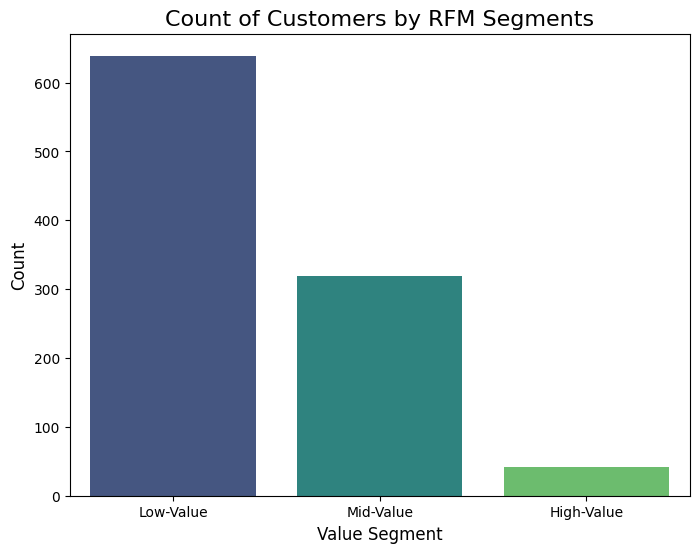

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
count_plt = sns.countplot(data=data, x='Value Segment', palette='viridis')
plt.title('Count of Customers by RFM Segments', fontsize=16)
plt.xlabel('Value Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

## RFM Customer Segmentation Analysis: A Deep Dive into Customer Value

### Segmentation Methodology:
We've meticulously dissected our customer base into a strategic three-tiered value framework, revealing the intricate layers of customer engagement and potential:

**Low-Value Customers**: The Sleeping Potential

**Mid-Value Customers**: The Emerging Opportunities

**High-Value Customer**s: The Business Powerhouses


### Key Insights: Unveiling Customer Dynamics

Customer Segment Distribution:
Our granular visualization exposes the critical ecosystem of our customer portfolio. This isn't just a simple breakdown – it's a strategic map revealing the precise anatomical structure of our customer base, illuminating pathways for targeted growth and strategic resource allocation.
Segment Characteristics: A Detailed Customer Landscape

Strategic Implications: Transformative Approaches

Retention Strategy: Precision-Driven Customer Development

Implement targeted migration strategies to elevate mid-value customers
Craft sophisticated retention programs for high-value customer preservation
Design intelligent re-engagement mechanisms for low-value customer activation


Marketing Approach: Hyper-Personalized Customer Engagement

Develop segment-specific marketing architectures
Create laser-focused communication strategies
Optimize resource allocation with surgical precision





##Recommendations: Strategic Customer Value Optimization

Design segment-specific marketing interventions
Architect loyalty programs that incentivize customer progression
Implement nuanced, personalized communication frameworks
Conduct comprehensive analytical explorations to decode customer value drivers

##Limitations and Strategic Considerations:

Recognition of historical data constraints
Commitment to dynamic, continuous segment monitoring
Acknowledgment of potential external influencing factors

Beyond the Numbers: A Strategic Perspective
This analysis transcends mere data interpretation. It's a strategic roadmap that transforms customer segments from statistical representations into actionable, value-generating opportunities.
Our approach doesn't just categorize customers – it provides a sophisticated lens to understand, predict, and strategically engage with our most valuable asset: our customer base.